In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics

### Loading the Data

In [2]:
csv1 = pd.read_csv('SalesBasedOnAdvertising.csv')
df_marketing = pd.DataFrame(csv1)

###  Analyzing and Cleaning data

In [3]:
df_marketing.shape

(204, 5)

##### Number of row 204 and Columns 5

In [4]:
df_marketing.head()

,Sno,TV,radio,newspaper,sales
0,1,219.0,NaN,34.5,48.9
1,2,230.1,37.8,69.2,22.1
2,3,44.5,39.3,45.1,10.4
3,4,17.2,45.9,69.3,9.3
4,5,151.5,41.3,58.5,18.5


In [5]:
df_marketing.dtypes

Sno            int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

##### All Datatypes are as per values and no change is needed

In [6]:
sales_null = df_marketing[(df_marketing["sales"].isna()) |(df_marketing["sales"] == 0) ]
sales_null

,Sno,TV,radio,newspaper,sales
97,98,0.0,18.0,67.0,0.0
121,122,69.4,3.0,34.0,0.0


In [7]:
df_marketing =  df_marketing.drop(sales_null.index)
df_marketing

,Sno,TV,radio,newspaper,sales
0,1,219.0,NaN,34.5,48.9
1,2,230.1,37.8,69.2,22.1
2,3,44.5,39.3,45.1,10.4
3,4,17.2,45.9,69.3,9.3
4,5,151.5,41.3,58.5,18.5
...,...,...,...,...,...
199,200,38.2,3.7,13.8,7.6
200,201,94.2,4.9,8.1,9.7
201,202,177.0,9.3,6.4,12.8
202,203,283.6,42.0,66.2,25.5


In [8]:
Sno_null = df_marketing[(df_marketing["Sno"].isna()) |(df_marketing["Sno"] == 0) ]
Sno_null

,Sno,TV,radio,newspaper,sales


In [9]:
TV_null = df_marketing[(df_marketing["TV"].isna()) |(df_marketing["TV"] == 0) ]
TV_null

,Sno,TV,radio,newspaper,sales


In [10]:
radio_null = df_marketing[(df_marketing["radio"].isna()) |(df_marketing["radio"] == 0) ]
radio_null

,Sno,TV,radio,newspaper,sales
0,1,219.0,NaN,34.5,48.9
131,132,80.2,0.0,9.2,8.8


In [11]:
newspaper_null = df_marketing[(df_marketing["newspaper"].isna()) |(df_marketing["newspaper"] == 0) ]
newspaper_null

,Sno,TV,radio,newspaper,sales


In [12]:
df_marketing.iloc[radio_null.index,2]

0       NaN
133    12.0
Name: radio, dtype: float64

In [13]:
mean_radio = np.mean(df_marketing['radio'])
mean_radio

23.247761194029874

In [14]:
for i in radio_null.index :
    df_marketing.at[i,'radio'] = mean_radio

In [15]:
radio_null = df_marketing[(df_marketing["radio"].isna()) |(df_marketing["radio"] == 0) ]
radio_null

,Sno,TV,radio,newspaper,sales


In [16]:
df_marketing.head()

,Sno,TV,radio,newspaper,sales
0,1,219.0,23.247761,34.5,48.9
1,2,230.1,37.800000,69.2,22.1
2,3,44.5,39.300000,45.1,10.4
3,4,17.2,45.900000,69.3,9.3
4,5,151.5,41.300000,58.5,18.5


In [17]:
df_marketing.isnull().sum()

Sno          0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No null Values are left now

#### Explanatory analysis

In [18]:
df_marketing.describe()

,Sno,TV,radio,newspaper,sales
count,202.000000,202.000000,202.000000,202.000000,202.000000
mean,102.425743,147.710396,23.362849,30.516337,14.159406
std,59.310021,85.689200,14.682814,21.687071,5.765728
min,1.000000,0.700000,0.300000,0.300000,1.600000
25%,51.250000,74.800000,10.225000,12.825000,10.325000
50%,102.500000,150.650000,23.247761,25.750000,12.900000
75%,153.750000,218.875000,36.450000,44.900000,17.400000
max,204.000000,296.400000,49.600000,114.000000,48.900000


In [19]:
df_marketing.shape

(202, 5)

In [20]:
df_marketing.median()

Sno          102.500000
TV           150.650000
radio         23.247761
newspaper     25.750000
sales         12.900000
dtype: float64

In [21]:
df_marketing.dtypes

Sno            int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

The given dataset comprises of 202 rows and 5 columns. All the columns have float values except the Sno column which is integer. The further statistics are mentioned in the above columns i.e  columns, their type, ranges, mean, median, std deviation, different quartiles, minimum and maximum values of each column.

#### Visualizing the Data

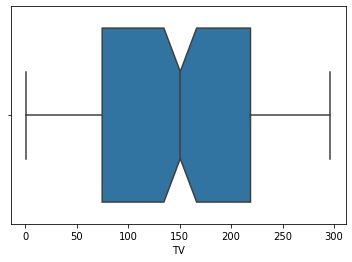

In [22]:
sns.boxplot(df_marketing['TV'], notch = True)

The box plot shows the price of advertising on TV shows.The range of the cost is between 0 to 300. The notch in the graph converges at the median value which is just in the middle at the value of 150.
The 25th percentile is about 75 and 75th percentile is about 220.


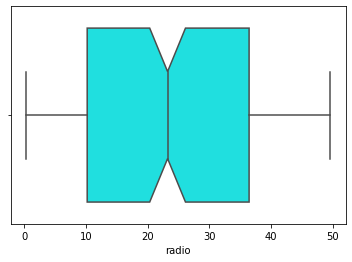

In [23]:
sns.boxplot(df_marketing['radio'], notch = True,color = 'Aqua')

The box plot shows the price of advertising on radio shows.The range of the cost is between 0 to 50. The notch in the graph converges at the median value which is just in the middle at the value of 23. The 25th percentile is about 10 and 75th percentile is about 37.

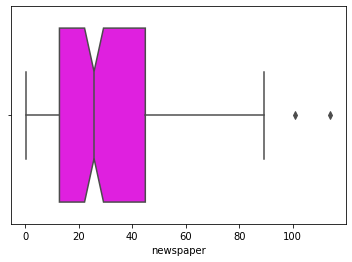

In [24]:
sns.boxplot(df_marketing['newspaper'], notch = True,color = 'magenta')

The box plot shows the price of advertising on newspapers. The range of the cost is between 0 to 90 there are two outliers which are at around 102 and 116. The notch in the graph converges at the median value which is at the value of 24 approx. The 25th percentile is about 10 and 75th percentile is about 44.

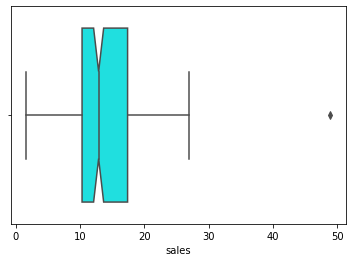

In [25]:
sns.boxplot(df_marketing['sales'], notch = True,color = 'aqua')

The box plot shows the sales of advertising of all shows.The range of the cost is between 0 to 26 there is outlier which is at around 48. The notch in the graph converges at the median value which is at the value of 13 approx. The 25th percentile is about 10 and 75th percentile is about 17.

In [26]:
plots = np.array(df_marketing[['sales','TV','radio','newspaper']])

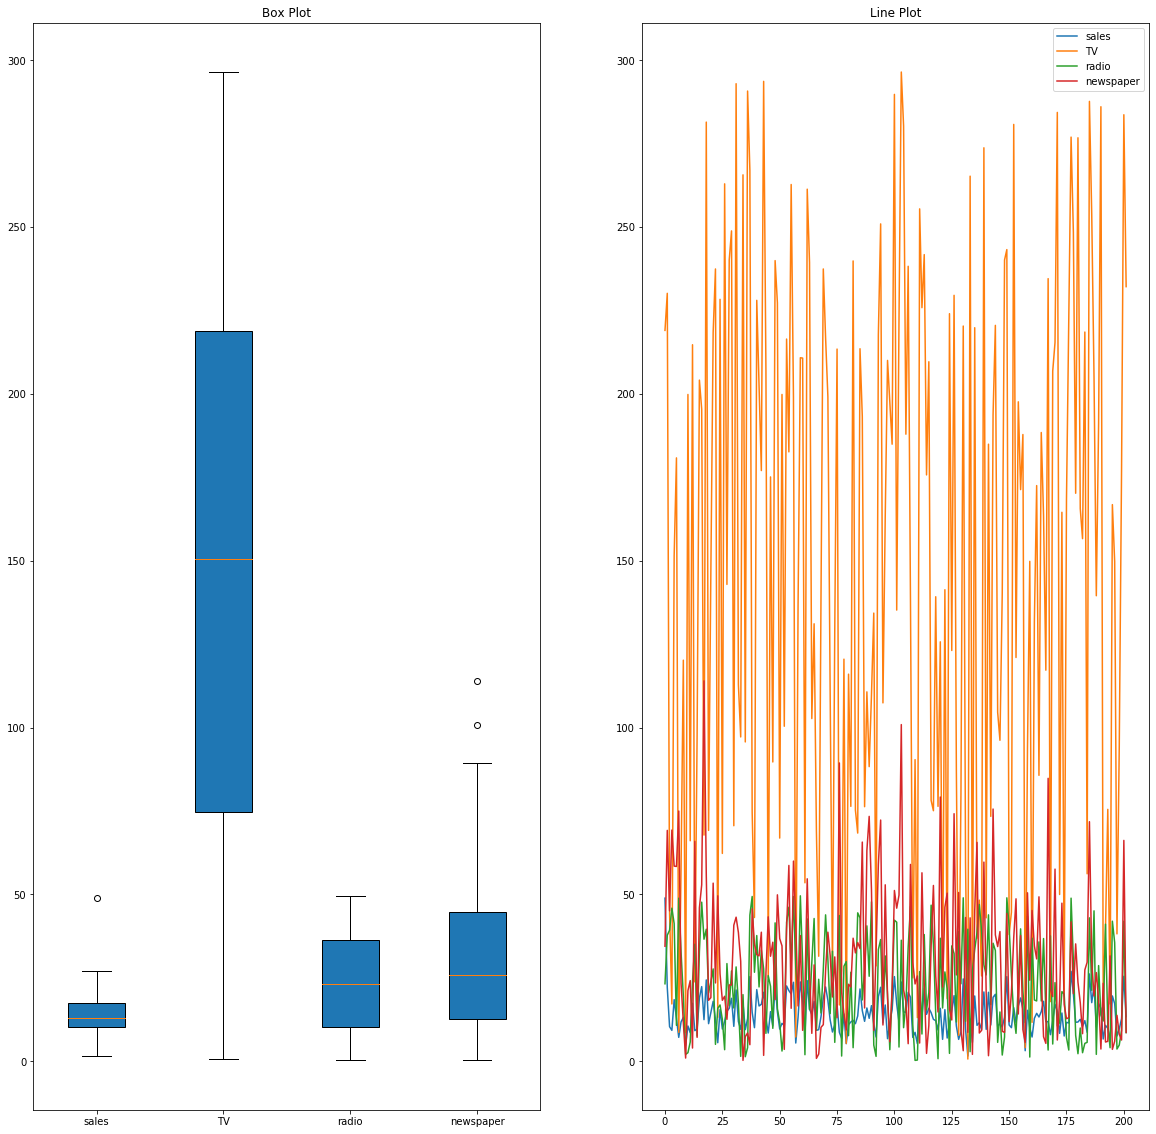

In [27]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
bp = ax1.boxplot(plots,patch_artist = True)
ax1.set_xticklabels(['sales','TV','radio','newspaper'])
ax1.set_title('Box Plot')
ax2 = plt.plot(plots)
plt.legend(labels = ['sales','TV','radio','newspaper'])
ax2 = plt.title('Line Plot')
plt.show()

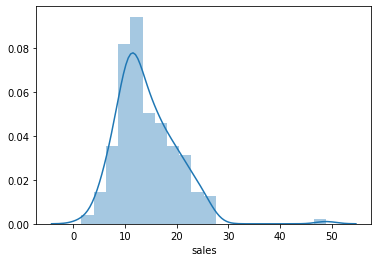

In [28]:
ax = sns.distplot(df_marketing['sales'])

The KDE plot i.e the kernel density estimation plot is a way to estimate the probality density function of a given dataset. In easy words this plot tell about the range of values in data where the most of the values of the dataset lie. The slope of the graph decreases as the number of values increase. In this graph we can see that the slope is flat at the range of the 10 to 13 lakhs. This means most of the sales values lie in the range of 10 - 14 lakhs. 

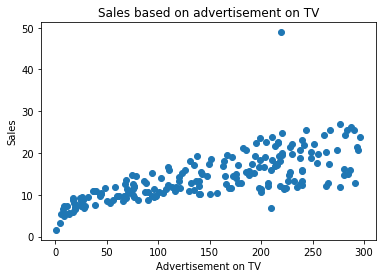

In [29]:
plt.scatter(df_marketing['TV'],df_marketing['sales'])
plt.title('Sales based on advertisement on TV')
plt.xlabel('Advertisement on TV')
plt.ylabel('Sales')
plt.show()

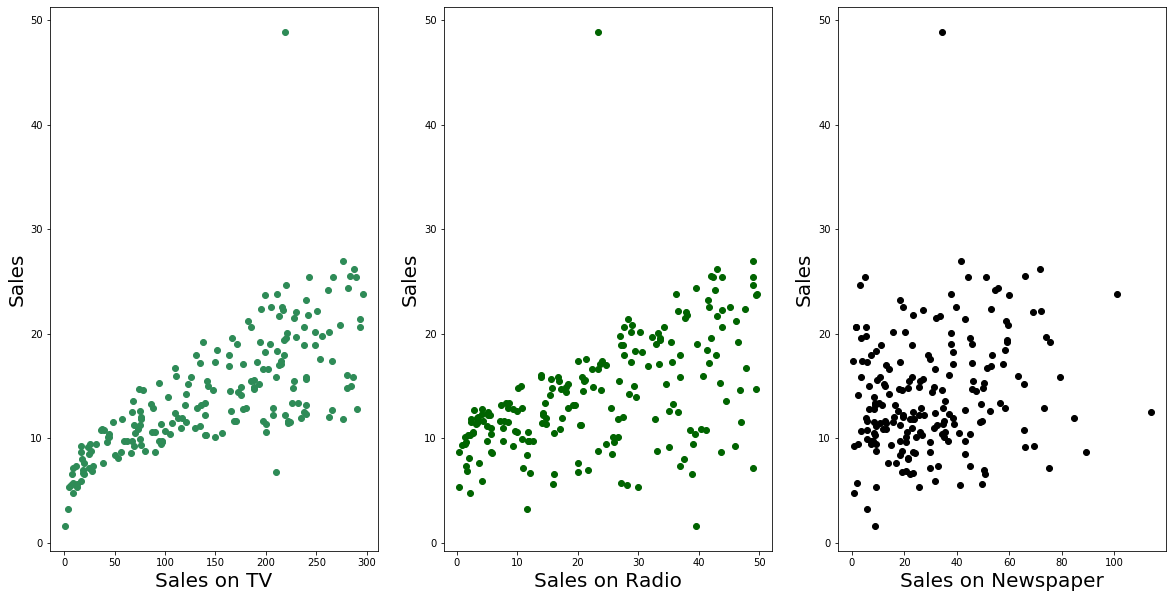

In [30]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131)
ax1 = plt.scatter(df_marketing['TV'],df_marketing['sales'],color='seagreen')
plt.xlabel('Sales on TV',fontsize = 20)
plt.ylabel('Sales',fontsize = 20)
ax2 = fig.add_subplot(132)
ax2 = plt.scatter(df_marketing['radio'],df_marketing['sales'],color='darkgreen')
plt.xlabel('Sales on Radio',fontsize = 20)
plt.ylabel('Sales',fontsize = 20)
ax3 = fig.add_subplot(133)
ax3 = plt.scatter(df_marketing['newspaper'],df_marketing['sales'],color='black')
plt.xlabel('Sales on Newspaper',fontsize = 20)
plt.ylabel('Sales',fontsize = 20)
plt.show()

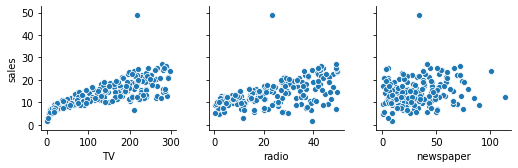

In [31]:
sns.pairplot(df_marketing,x_vars = ['TV', 'radio', 'newspaper'], y_vars = ['sales'])
plt.show()

### Creating Prediction Model using Simple Linear Regression

In [32]:
df = np.array(df_marketing['TV']+df_marketing['radio']+df_marketing['newspaper'])
df_marketing['TotalAdvt'] = df
df_marketing.head()

,Sno,TV,radio,newspaper,sales,TotalAdvt
0,1,219.0,23.247761,34.5,48.9,276.747761
1,2,230.1,37.800000,69.2,22.1,337.100000
2,3,44.5,39.300000,45.1,10.4,128.900000
3,4,17.2,45.900000,69.3,9.3,132.400000
4,5,151.5,41.300000,58.5,18.5,251.300000


In [33]:
from sklearn.model_selection import train_test_split
a = df_marketing[['TotalAdvt']]
b = df_marketing["sales"]
train_a, test_a, train_b, test_b = train_test_split(a,b,test_size=0.2)
from sklearn import linear_model, metrics
simple_model = linear_model.LinearRegression()
simple_model.fit(train_a, train_b)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
simple_model.intercept_ 
# Value of intercept

4.215631959715115

In [35]:
simple_model.coef_[0]
# Value of slope

0.04853273839205152

In [36]:
simple_model.score(train_a,train_b)
# Value of R-Square

0.7025834739603523

The slope of the line is close to zero which shows that the regression line is horizontal and somewha parallel to x axis

What will be the Sales using the above Model if total expenditure on advertisements is Rupees 50,000. Show the steps done to find out the Sales value. (write the mathematical equation used )


#### Mathematical Equation used : Y = M x + c
#### Where Y is sales. X is total cost of advertisement , M is slope and and C is intercept. 

In [37]:
m = simple_model.coef_[0]
c = simple_model.intercept_
sales = m * 50 + c
sales
#predicted Sales for Rs.50000 of advertisement

6.64226887931769

Perform part c) using the predict method for the model created in part b)¶

In [38]:
simple_model.predict([[50]])

array([6.64226888])

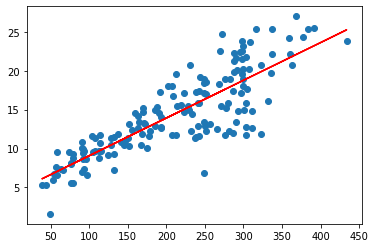

In [39]:
plt.scatter(train_a,train_b)
plt.plot(train_a, m * train_a + c,'r')
plt.show()

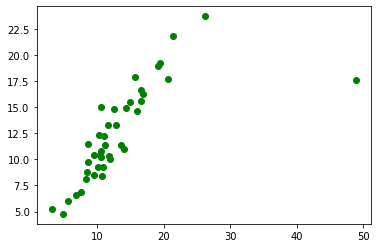

In [40]:
plt.scatter(test_b,simple_model.predict(test_a),color='g')
plt.show()

### The prediction model is not up to the mark as the values shown by the graph are scattered


## Multivariate Prediction Model using Linear Regression

In [41]:
x = df_marketing[['TV','radio','newspaper']]
train_x, test_x, train_y, test_y = train_test_split(x, b, test_size = 0.2)
multi_model = linear_model.LinearRegression()
multi_model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
c = multi_model.intercept_
c
#Intercept value of the multi_model

2.641684688882611

In [43]:
m = multi_model.coef_
m
#Slope of multi_model

array([0.04761729, 0.18381003, 0.00811829])

In [44]:
multi_model.score(train_x,train_y)
#R-Square Value

0.729999830499226

#### The value of R-square is high than the previous value in the single variate regression.
#### This means the model is better fit in the multivariate regression.

Mathematical equation  :
<br>Y = m[0] * x1 + m[1] * x2 + m[2] * x3 + c

Where :
<br>
    x1 = (Total Cost On Advertisement by TV)
    <br>
    x2 = (Total Cost On Advertisement by radio)
    <br>
    x3 = (Total Cost On Advertisement by newspapers)
    <br>
    Y is the predicted sales value for particular x1 x2 and x3
    <br>

In [45]:
m[0] * 90 + m[1] * 3 + m[2] * 45 + c
# Where :
# x1 = (Total Cost On Advertisement by TV) = 90000
# x2 = (Total Cost On Advertisement by radio) = 3000
# x3 = (Total Cost On Advertisement by newspapers) = 45000
# Y is the predicted sales value for particular x1 x2 and x3 

7.843993625054325

In [46]:
m[0] * 290 + m[1] * 0 + m[2] * 80 + c
# Where :
# x1 = (Total Cost On Advertisement by TV) = 290000
# x2 = (Total Cost On Advertisement by radio) = 0
# x3 = (Total Cost On Advertisement by newspapers) = 80000
# Y is the predicted sales value for particular x1 x2 and x3 

17.100160828487674

In [47]:
# d) Perform part b) using  the predict method for the model.
multi_model.predict([[90, 3, 45]])

array([7.84399363])

In [48]:
multi_model.predict([[290, 0, 80]])

array([17.10016083])

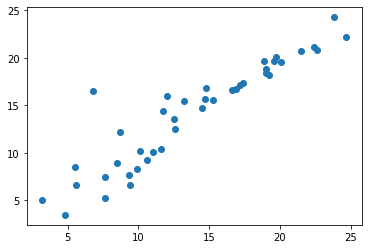

In [49]:
plt.scatter(test_y, multi_model.predict(test_x))
plt.show()

#####  We can clearly see here that the scattering is way less than the previous single variate regression. Hence, this regression fits the data better and will serve more accurate predictions.

###  Model Performance

In [50]:
simple_y = simple_model.predict(a)

In [51]:
multi_y = multi_model.predict(df_marketing[['TV', 'radio', 'newspaper']])

In [52]:
simple_mse = metrics.mean_squared_error(df_marketing['sales'],simple_y)
simple_mse

11.915337198928087

In [53]:
multi_mse = metrics.mean_squared_error(df_marketing['sales'], multi_y)
multi_mse

8.13938994187248

The Simple model here has more error value than the Multivariate model error value.
So, what we can conclude that from here is that the multivariate model is better than the single one.